<a href="https://colab.research.google.com/github/nprimavera/Robot-Learning/blob/main/mecs6616_Spring2025_Project2_ncp2136.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MECS6616 Spring 2025 - Project 2**

# **Introduction**

***IMPORTANT:***
- **Before starting, make sure to read the [Assignment Instructions](https://courseworks2.columbia.edu/courses/197115/pages/assignment-instructions) page on Courseworks to understand the workflow and submission requirements for this project.**

This project aims to demonstrate how neural networks can be used in a robotics setting. We will continue using the 2D maze environment introduced in Project 1 and learn to navigate an agent to a goal. Since neural networks can be more powerful models than the ones we had access to in Project 1, we can afford to make some changes to the 2D maze environment and make the problem more difficult. The project is divided into three parts: In Part I, you will train a simple Deep Neural Network (DNN) to predict the optimal action towards the goal given the agent position and the goal position. In Parts II and III, you will train Convolutional Neural Networks (CNNs) to predict the optimal action given images of the maze environment.

<div>
<img src="https://github.com/roamlab/robot-learning-S2023/blob/main/project2/imgs/P1_side.png?raw=true" width="300"/>
</div>

The figure above illustrates the simulation world, where the "robot" (also referred to as "agent") is represented by a green dot, and the goal location is marked by a red square. The agent's objective is to navigate to this goal location, avoiding any obstacles (depicted as black boxes) along the way.

**Unlike the previous project, the robot and the goal are spawned at random positions in the maze.** Also, the action space now contains all four directions: 'up', 'down', 'left' and 'right'. Another change is that, in addition to the obstacle map shown above, we introduce two new obstacle maps as shown below. However, these new maps will not be used until Part III.

<div>
<img src="https://github.com/roamlab/robot-learning-S2023/blob/main/project2/imgs/map1.png?raw=true" width="300"/>
<img src="https://github.com/roamlab/robot-learning-S2023/blob/main/project2/imgs/map2.png?raw=true" width="300"/>
<img src="https://github.com/roamlab/robot-learning-S2023/blob/main/project2/imgs/map3.png?raw=true" width="300"/>
</div>

We want to learn to navigate the agent by imitating demonstrations from an expert user. In all three parts, you will be using data collected by a human controlling the agent via a keyboard for training.

# **Project Setup (do NOT change)**

***IMPORTANT:***
- Do NOT change this "*Project Setup*" section
- Do NOT install any other dependencies or a different version of an already provided package. You may, however, import other packages
- Your code should go under the subsequent sections with headings "*Part 1*", "*Part 2*", and "*Part 3*"
- You may find it useful to minimize sections using the arrows located to the left of each section heading
- You may not use pre-trained models or any form of transfer learning for Part 2 and Part 3

You will be accessing data files located in a Google Drive folder. The following cell downloads the data from the cloud

In [1]:
# DO NOT CHANGE
# Download data
!wget https://www.dropbox.com/scl/fi/gy1d0ifkwuusmdjv796dl/project2.zip?rlkey=h6wresrsqxiryhlvrssjla5hn&st=cfvqccqm&dl=0
!mv project2.zip?rlkey=h6wresrsqxiryhlvrssjla5hn project2.zip

--2025-03-02 23:19:19--  https://www.dropbox.com/scl/fi/gy1d0ifkwuusmdjv796dl/project2.zip?rlkey=h6wresrsqxiryhlvrssjla5hn
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc138b515729d326ffd35d413bfd.dl.dropboxusercontent.com/cd/0/inline/ClJjSWHsdcsf8rQg48vDBA-StUWYBfZRGz6s7BM6W2HfPR-UzmL0IAKGRZv7dRd4nG-wtcUx42RTcNj54C4zE1_KfpkoL1Xk6C3zm2T7p19n-rIGnPsEbKZiDHancoiD6utwRGxkBjoJ5vOdjxHoXlga/file# [following]
--2025-03-02 23:19:20--  https://uc138b515729d326ffd35d413bfd.dl.dropboxusercontent.com/cd/0/inline/ClJjSWHsdcsf8rQg48vDBA-StUWYBfZRGz6s7BM6W2HfPR-UzmL0IAKGRZv7dRd4nG-wtcUx42RTcNj54C4zE1_KfpkoL1Xk6C3zm2T7p19n-rIGnPsEbKZiDHancoiD6utwRGxkBjoJ5vOdjxHoXlga/file
Resolving uc138b515729d326ffd35d413bfd.dl.dropboxusercontent.com (uc138b515729d326ffd35d413bfd.dl.dropboxusercontent.com)... 162.125.1.15, 2620:1

In [2]:
# Make sure you have successfully uploaded the zip file to Colab before running the line below.
# If wget fails to pull the zip file, you can download the zipfile from dropbox and manually upload it to collab instead
# If you do decide to manually upload the file, use the dropbox link in the previous cell (after wget) to access the file
# Make sure the zip file is named "project2.zip", rename it before uploading (if necessary)
# Upload the entire zip file to google colab. Do not unzip before uploading

# Unzip the uploaded zip file
!unzip -o project2.zip -d /content/

Archive:  project2.zip
   creating: /content/mjcf/
  inflating: /content/mjcf/point_mass.xml  
   creating: /content/mjcf/common/
  inflating: /content/mjcf/common/skybox.xml  
  inflating: /content/mjcf/common/visual.xml  
  inflating: /content/mjcf/common/materials.xml  
  inflating: /content/mjcf/test_mjcf.xml  
  inflating: /content/dnn.py         
   creating: /content/imgs/
  inflating: /content/imgs/P1_side.png  
  inflating: /content/imgs/map1.png  
  inflating: /content/imgs/map3.png  
  inflating: /content/imgs/map2.png  
  inflating: /content/score_policy.py  
  inflating: /content/simple_maze.py  
  inflating: /content/data_utils.py  
   creating: /content/data/
  inflating: /content/data/map1.pkl  
  inflating: /content/data/all_maps.pkl  


In [3]:
# DO NOT CHANGE

# Install required packages
!pip install pybullet numpngw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 7.4 MB/s eta 0:00:00


# Part I. Behavioral cloning with low dimensional data

This part is a natural extension of Part II in Project 1, where your agent needs to learn a policy using labeled examples from an expert.

Each labeled example $i$ will contain a tuple of the form $(o, a)^i$, where $o$ represents an observation and $a$ represents the action taken by the expert given that observation. You must simply learn to imitate the expert, a process also known as behavioral cloning. Note that while the observation space will be different in each part, the action space is the same for the rest of the project.

We will be training a DNN policy to predict an action to be taken ('up', 'down', 'left', and 'right') based on the observation. **In Part I, the observation will contain the agent position and the current goal position.** (Since the goal is sampled randomly, the policy has to know the current goal to be reached). The environment thus returns an observation array of size (4, ) where the agent position is contained in the first two axes and the current goal position is contained in the next two. **In Part I, the map that the robot is navigating is always the same.**

PyTorch and Tensorflow are two popular frameworks for building and training neural networks but for this class, we will be exclusively using PyTorch and you are allowed to use any of its features. A good starting point can be found [here](https://github.com/roamlab/robot-learning-S2024/blob/main/dnn_example.py).

You will implement a class that inherits from `RobotPolicy` by providing implementations for the abstract methods from the class. These abstract methods will be re-used by future parts of the project, so do not edit them.



In [4]:
# DO NOT CHANGE
# base class

import abc


class RobotPolicy(abc.ABC):

    @abc.abstractmethod
    def train(self, data):
        """
            Abstract method for training a policy.

            Args:
                data: a dict that contains X (key = 'obs') and y (key = 'actions').

                X is either rgb image (N, 64, 64, 3) OR  agent & goal pos (N, 4)

            Returns:
                This method does not return anything. It will just need to update the
                property of a RobotPolicy instance.
        """

    @abc.abstractmethod
    def get_action(self, obs):
        """
            Abstract method for getting action. You can do data preprocessing and feed
            forward of your trained model here.
            Args:
                obs: an observation (64 x 64 x 3) rgb image OR (4, ) positions

            Returns:
                action: an integer between 0 to 3
        """

In [5]:
# Part 1

import torch                     # PyTorch - main library for tensor computations
import torch.nn as nn            # Module for neural network layers
import torch.nn.functional as F  # Functional interface for neural networks
import numpy as np               # NumPy - numerical computing library

from torch.utils.data import Dataset, DataLoader, TensorDataset  # Managing data

# Dataset class for the maze navigation task - create a dictionary of observations and actions
class MyDataset(Dataset):

    # Initialize the dataset
    def __init__(self, observations, actions):
        super(MyDataset, self).__init__()  # Call parent constructor
        self.observations = observations  # obs
        self.actions = actions  # actions

    # Length of the data set
    def __len__(self):
        return len(self.observations)  # Returns the number of samples in the dataset
        #return self.actions.shape[0]

    # Single data point within the dataset
    def __getitem__(self, idx): # #This tells torch how to extract a single datapoint from a dataset - Torch randomized and needs a way to get the nth-datapoint
        observation = self.observations[idx]  # Get observation at index
        action = self.actions[idx]  # Get action at index
        return {'observation': observation, 'action': action}  # Return obs and actions as a dictionary
        #return {
            #'observation': self.observations[idx],
            #'action': self.actions[idx]
        #}

# Class training a DNN to predict robot actions
class POSBCRobot(RobotPolicy):

    # Initialize my Deep Neural Network (DNN) model
    def __init__(self):

        # Parent class constructor - ensures all parent classes are initialized in the correct order
        super(POSBCRobot, self).__init__()  # ensures that the base class "RobotPolicy" is properly initialized when an instance of the child class "POSBCRobot" is created

        # Define a simple DNN architecture for action prediction - trained via Backpropagation/Gradient Descent
        """
        Architecture of a DNN (any NN with at least one hidden layer is "deep"):

        Input layer:
            - Acts like a translator that takes raw position data and turns it into a richer set of features, making it easier for the hidden layers to figure out how the agent should move to reach the goal
            - The input layer is the first layer that receives raw data and passes it to the rest of the network for further processing
            - inputs: 4 input features: [agent_x, agent_y, goal_x, goal_y]
            - outputs: 32 neurons - compute a weighted sum of the 4 input features, adds a bias and applies an activation function
            - Performs linear transformation:
                - y = x*W^T + b where x=input vector, W=weight matrix the network uses during training, b=bias term that shifts the output
            - Feature expansion:
                - Expands the raw input from 4 features to an output of 32 features
                - Expansion allows the model to capture nuanced relationships b/w the agent's and goal's positions by projecting the input into a higher-dim space
            - Prepares data for non-linear processing:
                - ReLU
            - The agent needs to understand directional relationships (left, right, up, down) and distance relationships (how far am I from each axis)

        Activation function (ReLU)
            - Rectified Linear Unit
            - ReLU is efficent, simple, and helps in speeding up the learning process
            - ReLU(x) = max(0,x)
                - if the input is positive, the output is the same as the input
                - if the input is negative, the output is zero
            - After the input layer is linearly transformed, the output is passed through ReLU activation function
            - The ReLU introduces non-linearity by setting all negative values to zero
                - Essential for learning complex patterns bc linear transformation alone would limit the model to simple linear relationships
            - Sparse activation
                - since all the negative values are 0, the network is more efficient in terms of computation and memory usage
            - Avoid vanishing(diminishing) gradient function
                - can occur with sigmoid or tanh activation functions
                - gradient of ReLU is either 0 (negative inputs) or 1 (positive inputs)
                - makes the training process more stable and faster

        Hidden layer:
            - 32 neurons (fully connected (dense) layer)
            - The hidden layer extracts meaningful patterns from raw inputs, allowing the network to make smarter decisions by learning non-linear mappings from positions to optimal actions
            - inputs: 32 features from input layer output - already transformed from the 4 raw input features
            - output: 32 features - passed to the output layer enriched with leared patterns about how agent and goal positions relate to actions
            - Transforms input features:
                - takes raw input features (agent and goal positions) and transforms them into a more abstract representation
                - these transformations help the model capture non-linear relationships between observations and actions
            - Learns feature interactions:
                - how the agent's position relative to the goal affects the next best action
                - patterns in movement depending on where the goal is located in the maze
                - without hidden layers, the model would only be able to learn simple, linear relationships between inputs and outputs
            - Enables non-linearity with activation functions:
                - ReLU
            - Intermediate computations:
                - hidden layer acts as a "workspace" where the model computes intermediate steps before deciding on the final actions
                - each neuron in the hidden layer can be thought of as detecting certain patterns or conditions that contribute to the final decision

        Activation function (ReLU)
            - ReLU after the hidden layer introduces non-linearity
            - Allows the model to solve more complex problems that aren't just straight line relationships
            - Ex: navigating around walls in a maze requires non-linear decision making

        Output layer:
            - Responsible for producing the network's predictions or decisions
            - Activation functions:
                - Softmax (for Mulit-Class Classification)
                - Sigmoid (for Binary Classification)
                - Linear (for Regression)
            - inputs: 32 neurons from hidden layer
            - outputs: 4 possible actions: [up, down, left, right]
        """
        self.model = nn.Sequential(
            nn.Linear(4, 32),  # Input layer: 4 features (neurons) --> 32 neurons
            nn.ReLU(),         # Activation function (ReLU)
            nn.Linear(32, 32), # Hidden layer: 32 neurons --> 32 neurons
            nn.ReLU(),         # Activation function (ReLU)
            nn.Linear(32, 4)   # Output layer: 32 neurons --> 4 actions (neurons)
        )

        # Hyperparameters
        """
        Adam Optimizer (Adaptive Moment Estimation):
            - Optimization algorithm that computes adaptive learning rates for each param, helping the model converge faster during training
            - Combines the advantages of two other extensions of stochastic gradient descent (SGD): AdaGrad and RMSProp
                - uses both first the first moment (mean) and second moment (variance) of the gradients to adapt the learning rates for each parameter
        """
        self.learning_rate = 0.01   # Learning rate for the optimizer
        self.criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification - Classification
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate) # Adam optimizer
        self.num_epochs = 500   # Number of training epochs
        self.batch_size = 100    # Batch size for training

    # Train the DNN using Behavioral Cloning Data
    def train(self, data):

        print('Part 1: Behavioral Cloning with Low Dimensional Data')

        # Data
        #for key, val in data.items():
            #print(key, val.shape)
        #print(data)
        print(f'\nObservations shape: {data["obs"].shape}\n') # Environment returns an observation array of of size (x,4) - agent pos is first 2 and goal is last 2
        print(f'Observations (first 10):\n', data['obs'][:10])  # Observation will contain agent position and current goal position
        print(f'\nActions shape: {data["actions"].shape}\n')
        print(f'Actions (first 10):', data['actions'][:10], '\n')

        # Extract observations and actions from the dataset
        observations = data['obs']
        actions = data['actions']

        # Prepare the data
        dataset = MyDataset(observations, actions)  # Create dataset instance
        dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)  # Create dataloader

        # Training loop for each epoch
        self.model.train()  # Set the model to training mode
        for epoch in range(self.num_epochs):
            total_loss = 0.0  # Accumulate loss for the epoch
            for batch in dataloader:
                obs_batch = batch['observation'].float()  # Convert observations to float tensor - number that can represent decimal and fraction values
                act_batch = batch['action'].long()        # Convert actions to long tensor - integer type used to store whole numbers

                # Backpropagation
                """
                Backpropagation (essentially gradient descent):
                  - allows the NN to learn by propagating the error backward from the output layer to input layer, adjusting the weights based on the computed gradients to minimize prediction error
                  - gradient is a vector of partial derivatives that represents the rate of change of a function with respect to its input variables --> measures how much a change in each weight or bias affects the loss
                  - Forward Pass - input data is passed through the neural network layer by layer and each layer applies a transformation to the input data using its weights and activation function, producing an output
                  - Loss Calculation - measures the difference between the predicted output and the actual target output (ground truth)
                  - Backward Pass (Backpropagation)
                        - Gradient Calculation - calculating the gradient of the loss function with respect to each weight in the network, indicating how much changing each weight would affect the loss
                        - Weight Update - using the gradients computed during backpropagation, the network updates its weights to minimize the loss (use an optimizer)
                  - Iterative Process (number of epochs)
                        - the process of forward pass, loss calculation, backward pass (gradient computation), and weight update is iterated multiple times (epochs) over the entire dataset
                        - with each iteration, the network learns to adjust its weights to improve its predictions gradually
                  - Training Completion
                """
                self.optimizer.zero_grad()  # Clears the gradients
                outputs = self.model(obs_batch) # Forward pass
                loss = self.criterion(outputs, act_batch) # Compute loss
                loss.backward() # Backward pass
                self.optimizer.step() # Update weights
                total_loss += loss.item() # Accumulate total loss

            print(f"Epoch {epoch+1}/{self.num_epochs}, Loss: {total_loss / len(dataloader):.4f}")   # Update loss after each epoch computed

            # Stop training if loss is very good - avoids overfitting
            if total_loss / len(dataloader) < 0.075:
                print(f"\nLoss is very low, stopping training. \n\nFinal loss: {loss.item()}")
                break

    # Predict the robot's action given an observation using the trained DNN model
    def get_action(self, obs):

        self.model.eval()  # Set the model to evaluation mode
        obs_tensor = torch.from_numpy(np.array(obs)).float().unsqueeze(0)  # Convert the observation to a tensor

        # Disable gradiet calculations for inference - reduces memory usage and speeds up computation
        with torch.no_grad():
            # Forward pass
            output = self.model(obs_tensor)
            predicted_action = torch.argmax(output, dim=1).item() # Predicted action (index with max value) - highest score evaluated by the model
        return predicted_action

## Evaluation and Grading

We will evaluate your model by simply having the agent follow the commands that it provides.  We will evaluate for 100 different randomly sampled starting positions and goals. For each goal, we roll out the trained policy for 50 steps. After the 50 steps, we will evaluate the closest distance to the goal the agent has ended up. If the agent reaches < 0.1 distance from the goal, the episode is ended before 50 steps and the minimum distance will be recorded as 0. The score is the fraction of the initial distance to goal covered by the agent averaged over 100 trials. Your final grade will be computed based on this score.

We will calculate the score using the formula :

```score = avg[(init_dist -  min_dist) / init_dist]```

We will auto-generate your grades using the code below. The grading of each part is separate from each other so you can get the grade right after each part is finished.

The total points of this assignment are 15. According to the difficulty level of each part, parts 1, 2, and 3 have 4, 5, 6 points respectively.

- Part 1: if your score >= 0.99, you will receive 4 / 4. Otherwise, your final grade will be score / 0.99 * 4.
- Part 2: if your score >= 0.95, you will receive 5 / 5. Otherwise, your final grade will be score / 0.95 * 5.
- Part 3: if your score >= 0.95, you will receive 6 / 6. Otherwise, your final grade will be score / 0.95 * 6.

The score function for each part provides two extra arguments to assist your debugging.

- gui: If this is set to True, you will save the behavior of the agents during evaluation as an animation file. This animation file can be visualized using the provided code below to help you understand the behavior of the agent. **Please set it to False before your submission as it will slow down evaluation.**
- model: If you provide a path to a saved model, the score function will not train from scratch but will instead load the save model. **Please set it to None before submission.** Any models you generate during runtime will be automatically deleted when disconnected. The grader will train the model from scratch.

In [6]:
# DO NOT CHANGE
# Set up grading

import score_policy
import importlib
importlib.reload(score_policy)
from IPython.display import Image


part1_bound = 0.99
part2_bound = 0.95
part3_bound = 0.95

In [7]:
# DO NOT CHANGE
# Getting the score and grade for Part 1

score1 = score_policy.score_pos_bc(policy=POSBCRobot(), gui=True, model=None)
grade1 = score1 / part1_bound * 4 if score1 < part1_bound else 4

print('\n---')
print(f'Part 1 Score: {score1}')
print(f'Part 1 Grade: {score1:.2f} / {part1_bound:.2f} * 4 = {grade1:.2f}')

Part 1: Behavioral Cloning with Low Dimensional Data

Observations shape: (4000, 4)

Observations (first 10):
 [[-0.38606754 -0.37158364  0.0612401   0.38303697]
 [-0.38606754 -0.28158364  0.0612401   0.38303697]
 [-0.38606754 -0.18158363  0.0612401   0.38303697]
 [-0.38606754 -0.08158363  0.0612401   0.38303697]
 [-0.38606754  0.01841637  0.0612401   0.38303697]
 [-0.38606754  0.11841637  0.0612401   0.38303697]
 [-0.38606754  0.21841636  0.0612401   0.38303697]
 [-0.38606754  0.31841636  0.0612401   0.38303697]
 [-0.38606754  0.41841638  0.0612401   0.38303697]
 [-0.29606754  0.42841637  0.0612401   0.38303697]]

Actions shape: (4000,)

Actions (first 10): [0 0 0 0 0 0 0 0 2 2] 

Epoch 1/500, Loss: 0.9838
Epoch 2/500, Loss: 0.6581
Epoch 3/500, Loss: 0.5340
Epoch 4/500, Loss: 0.5060
Epoch 5/500, Loss: 0.4861
Epoch 6/500, Loss: 0.4736
Epoch 7/500, Loss: 0.4591
Epoch 8/500, Loss: 0.4455
Epoch 9/500, Loss: 0.4431
Epoch 10/500, Loss: 0.4353
Epoch 11/500, Loss: 0.4285
Epoch 12/500, Loss: 0

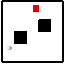

In [8]:
# Optionally, uncomment and run the code below if you have saved an animation (gui = True) that you want to visualize.

Image(filename='part_1_anim.png', width=200, height=200)

# Part II. Behavioral cloning with visual observations

In this part, you are asked to do a similar task as Part I, **but the observations will be RGB image observations of the world**, similar to the ones you used to do localization in Part III of Project 1. To process the RGB images, you will be implementing a CNN using PyTorch. [The official PyTorch tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) is a good starting point. As in Part I, the map that the robot is navigating is always the same. **This means that your model really only has to learn how to figure out where the robot and the goal are located, and how to navigate around a fixed set of obstacles.**

All requirements from your code, as well as the evaluation method, are unchanged compared to Part I. The only difference is the nature of the observation that is provided to you.

In [54]:
# Part 2

import torch                     # PyTorch - main library for tensor computations
import torch.nn as nn            # Module for neural network layers
import torch.nn.functional as F  # Functional interface for neural networks
import torch.optim as optim      # Optimization algorithms
import numpy as np
import random
import matplotlib.pyplot as plt
import cv2

from torchvision import transforms  # Data augmentation
from torch.utils.data import Dataset, DataLoader, TensorDataset  # For managing data
from sklearn.model_selection import train_test_split  # For splitting dataset

class MyDataset(Dataset):

    def __init__(self, images, labels, transform=None):
        """
        Args:
            images (numpy array): Array of images with shape (4000, 64, 64, 3)
            labels (numpy array): Corresponding action labels (4000,)
            transform (callable, optional): Optional transform to apply to images
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def shift_image_up(self, image, pixels=10):
        """Shifts the image up by a specified number of pixels, filling the bottom with zeros."""
        h, w, c = image.shape
        M = np.float32([[1, 0, 0], [0, 1, -pixels]])  # Transformation matrix
        shifted = cv2.warpAffine(image, M, (w, h))
        return shifted

    def __getitem__(self, idx):

        self.obs_image = self.images[idx]  # (64, 64, 3)
        self.action_label = self.labels[idx]  # Scalar

        # Apply shifting transformation
        self.obs_image = self.shift_image_up(self.obs_image, pixels=10)  # Apply image shifting

        # Convert observation image to PyTorch tensor and rearrange dimensions
        self.obs_image = torch.tensor(self.obs_image, dtype=torch.float32).permute(2, 0, 1)

        # Convert action label to a tensor (since it's just a scalar, no permute needed)
        self.action_label = torch.tensor(self.action_label, dtype=torch.long)  # Use long for classification

        # Extract data and convert to tensors
        #observations = torch.tensor(data['obs'], dtype=torch.float32).permute(0, 3, 1, 2)
        #actions = torch.tensor(data['actions'], dtype=torch.long)

        return self.obs_image, self.action_label

# Class training a Convolutional Neural Network (CNN) to predict robot actions
class RGBBCRobot1(RobotPolicy):

    # Initialize the CNN
    def __init__(self, seed_value=42):
        super(RGBBCRobot1, self).__init__() # Parent class constructor - ensures all parent classes are initialized in the correct order

        # Set the seed for reproducibility
        torch.manual_seed(seed_value)
        self.set_seed(seed_value)

        # Define CNN model
        self.model = self._build_model()

        # Loss Function
        self.criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification

        # Optimizer
        self.learning_rate = 0.001
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)
        #self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=10, gamma=0.5)  # Learning rate decay - every 10 steps by 0.5

        # Hyperparameters
        self.num_epochs = 30
        self.batch_size = 32

    # Seeding - the randomly initialized weights of the neural network should be made repeatable using seeding
    def set_seed(self, seed_value=42):
        random.seed(seed_value)  # Python's random module
        np.random.seed(seed_value)  # NumPy
        torch.manual_seed(seed_value)  # PyTorch for CPU
        torch.cuda.manual_seed(seed_value)  # PyTorch for GPU
        torch.cuda.manual_seed_all(seed_value)  # If using multi-GPU
        torch.backends.cudnn.deterministic = True  # Ensures deterministic behavior
        torch.backends.cudnn.benchmark = False  # Disables auto-optimization for reproducibility

    # CNN
    def _build_model(self):
        """
        CNN (Convolutional Neural Network):
            - CNNs are specifically designed for processing grid-like data such as images
            - Used in computer vision tasks like image classification, object detection, and image segmentation
            - They are inspired by the way the human visual cortex processes visual information
            - Image processing:  Input Image --> Deeper Convolutional Layers --> Pooling Layers --> Flatten and Fully Connected Layers
                - input image - passed through convolutional layers to extract low-level features
                - deeper convolutional layers - extract complex patterns and objects
                - pooling layers - reduce dimensionality while preserving important information
                - flatten and fully connected layers - convert feature maps into a final prediction

        Architecture of CNNs:

            Convolutional Layers:
                - apply filters (kernels) to the input data, performing a mathematical operation called convolution
                - each filter detects patterns like edges, textures, or shapes.
                - the output of a convolutional operation is called a feature map

            Activation Functions:
                - typically, ReLU (Rectified Linear Unit) is used after convolutional layers to introduce non-linearity into the model
                - ReLU is defined as: f(x) = max(0,x)
                - helps the network learn complex patterns and relationships in the data

            Pooling Layers:
                - reduce the spatial size/dimensions (width and height) of the data
                - help to decrease computational complexity and control overfitting (e.g., Max Pooling - selects the highest value from a small window)
                    - Example: A 2×2 max pooling takes the maximum value from every 2×2 region

            Fully Connected (FC) Layers:
                - after feature extraction, the network flattens the feature maps and passes them through fully connected layers
                - these layers function like traditional neural networks and are responsible for making final predictions

            Output Layer (Softmax for classification):
                - in classification problems, the last layer often applies the Softmax function to output class probabilities
        """
        # CNN Architecture for image input (64x64 RGB images)
        self.model = nn.Sequential(   # Sequential does a forward pass on the CNN
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1),  # Conv layer input shape: [batch_size, channels, height, width] , Output = [B,32,64,64]
            #nn.BatchNorm2d(16),  # Batch normalization layer
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Downsampling by a factor of 2 , output = [B,32,32,32]

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # [B, 64, 16, 16]
            #nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # [B, 64, 8, 8]

            nn.Flatten(),  # Converts [B, 64, 8, 8] -> [B, 64 * 8 * 8]

            nn.Linear(64 * 16 * 16, 128),
            nn.ReLU(),
            #nn.Dropout(0.3),

            nn.Linear(128, 4),  # Output: 4 possible actions
            nn.Softmax(dim=1)
        )

        return self.model

    # Train the CNN model on RGB image observations and corresponding actions
    def train(self, data):

        print('Part 2: Behavioral Cloning with Visual Observations\n')

        # Data
        #for key, val in data.items():
            #print(key, val.shape)
        print(f'Observations shape: {data["obs"].shape}\n')  # [4000, 64, 64, 3] = (batch_size, height, width, channels) format
        #print(f'Observations (first 2):\n', data['obs'][:2])  # Observation will contain agent position and current goal position - agent pos is first 2 and goal is last 2
        print(f'Actions shape: {data["actions"].shape}\n')
        #print(f'Actions (first 10):', data['actions'][:10], '\n')

        # Extract observations and actions
        observations = data['obs']
        actions = data['actions']
        self.obs_image = observations
        self.action_label = actions

        # Data extraction and reformating in one shot
        #observations = torch.tensor(data['obs'], dtype=torch.float32).permute(0, 3, 1, 2)
        #actions = torch.tensor(data['actions'], dtype=torch.long)

        # Split data into train, validation, and test sets (80% train, 10% validation, 10% test)
        #X_train, X_temp, y_train, y_temp = train_test_split(observations, actions, test_size=0.2, random_state=42)  # Split into train and val/test
        X_train, X_temp, y_train, y_temp = train_test_split(self.obs_image, self.action_label, test_size=0.2, random_state=42)  # Split into train and val/test
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Split remaining 20% into val (10%) and test (10%)

        print(f'Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}\n')

        # Convert observations data to tensor and permute dimensions to match PyTorch's format - PyTorch expects (batch_size, channels, height, width)
        #observations = torch.tensor(observations).float() # obs format = (batch_size, height, width, channels)
        #observations = observations.permute(0, 3, 1, 2)  # now: [batch_size, channels, height, width]

        # Convert actions data to a tensor
        #actions = torch.tensor(actions).long()
        #actions = torch.tensor(actions), dtype=torch.long

        # Convert the data to tensor and permute dimensions for PyTorch
        #X_train = torch.tensor(X_train).float().permute(0, 3, 1, 2)
        #y_train = torch.tensor(y_train).long()

        #X_val = torch.tensor(X_val).float().permute(0, 3, 1, 2)
        #y_val = torch.tensor(y_val).long()

        #X_test = torch.tensor(X_test).float().permute(0, 3, 1, 2)
        #y_test = torch.tensor(y_test).long()

        # Define transformations (normalization and data augmentation)
        transform = transforms.Compose([
            transforms.Resize((64, 64)),  # Resize if needed
            transforms.RandomHorizontalFlip(),  # Flip images randomly
            transforms.ToTensor(),  # Converts (H, W, C) to (C, H, W) & normalizes [0,1]
            transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
        ])

        # Prepare the dataset (dictionary of obs and actions)
        #dataset = TensorDataset(observations, actions)
        #dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        # Create DataLoaders for training and validation sets
        #train_dataset = TensorDataset(X_train, y_train)
        #val_dataset = TensorDataset(X_val, y_val)

        #train_dataloader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        #val_dataloader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False)

        # Create Dataset objects
        train_dataset = MyDataset(X_train, y_train, transform=transform)
        val_dataset = MyDataset(X_val, y_val, transform=transform)
        test_dataset = MyDataset(X_test, y_test, transform=transform)

        # Create DataLoaders
        train_dataloader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)
        val_dataloader = DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False)
        test_dataloader = DataLoader(test_dataset, batch_size=self.batch_size, shuffle=False)

        # Move model to GPU if available
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(device)

        # Initialize a variable to store the previous validation loss - for early stopping
        prev_val_loss = float('inf')  # Set to a high value initially

        # Training the CNN using Behavioral Cloning with visual observations
        for epoch in range(self.num_epochs):  # Training loop for each epoch
            self.set_seed(seed_value=42 + epoch)  # introduce some randomness
            self.model.train()  # Set the model to training mode
            total_loss = 0.0
            correct = 0.0
            total = 0.0

            #for batch in train_dataloader:
            for images, labels in train_dataloader:
                images, labels = images.to(device), labels.to(device)

                #obs_batch, act_batch = batch  # unpack batch into obs and actions

                #outputs = self.model(obs_batch) # Forward pass: get model predictions
                outputs = self.model(images)

                #loss = self.criterion(outputs, act_batch) # compute the loss between predictions and true labels
                loss = self.criterion(outputs, labels)

                self.optimizer.zero_grad()    # zero the gradients of the model's parameters

                loss.backward() # Backpropagation: compute gradients of the loss with respect to the model parameters
                self.optimizer.step() # Update the model parameters using the optimizer

                total_loss += loss.item() # Compute the loss for this batch

                _, predicted = torch.max(outputs, 1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)

            train_accuracy = correct / total * 100
            avg_train_loss = total_loss / len(train_dataloader)

            #self.scheduler.step() # Update the learning rate using scheduler

            """
            Validation Loss:
                - Used during training to evaluate performance and adjust hyperparameters (e.g., learning rate, batch size)
                - Overfit the model - don't care about the training loss, only the validation loss
            """
            # Validate on the validation set
            self.model.eval()  # Set the model to evaluation mode
            val_loss = 0.0
            val_correct_predictions = 0
            val_total_predictions = 0
            with torch.no_grad():  # Disable gradient computation for validation to save memory
                #for batch in val_dataloader:
                for val_images, val_labels in val_dataloader:
                    val_images, val_labels = val_images.to(device), val_labels.to(device)

                    #obs_batch, act_batch = batch

                    #outputs = self.model(obs_batch)
                    val_outputs = self.model(val_images)

                    #loss = self.criterion(outputs, act_batch)
                    val_loss_value = self.criterion(val_outputs, val_labels)

                    val_loss += loss.item()

                    _, val_predicted = torch.max(val_outputs, 1)
                    val_correct_predictions += (val_predicted == val_labels).sum().item()
                    val_total_predictions += val_labels.size(0)

            val_loss /= len(val_dataloader)  # Average validation loss
            val_accuracy = val_correct_predictions / val_total_predictions * 100

            #self.scheduler.step()  # Update learning rate

            # Print loss per epoch
            #print(f"Epoch {epoch + 1}/{self.num_epochs}, Training loss: {total_loss / len(train_dataloader):.4f}, Validation loss: {val_loss:.4f}")
            print(f"Epoch [{epoch+1}/{self.num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

            # Early stopping based on validation loss
            if val_loss < 0.1 or val_loss > prev_val_loss:
                print(f"\nStopping training early. Validation loss is either very low or getting worse.")
                break

            prev_val_loss = val_loss  # Update previous validation loss

            # Stop training if loss is very good - avoids overfitting
            #if total_loss / len(dataloader) < 0.1:
                #print(f"\nLoss is very low, stopping training. \n\nFinal loss: {total_loss / len(dataloader)}")
                #break

        # Test the model on the test set after training
        #self.evaluate(X_test, y_test)

    # Evaluate the model on the test set
    #def evaluate(self, X_test, y_test):
    def evaluate(self, test_dataloader, device):

        self.model.eval()  # Set the model to evaluation mode

        total_loss = 0
        correct = 0
        total = 0

        #test_dataset = TensorDataset(X_test, y_test)
        #test_dataloader = DataLoader(test_dataset, batch_size=self.batch_size, shuffle=False)

        with torch.no_grad():
            #for batch in test_dataloader:
            #for images, labels in test_dataloader:
            for test_images, test_labels in test_dataloader:
                #images, labels = images.to(device), labels.to(device)
                test_images, test_labels = test_images.to(device), test_labels.to(device)

                #obs_batch, act_batch = batch

                #outputs = self.model(obs_batch)
                test_outputs = self.model(test_images)

                #loss = self.criterion(outputs, labels)
                #total_loss += loss.item()

                _, predicted = torch.max(test_outputs, 1)  # Get the predicted actions
                #total += act_batch.size(0)
                #correct += (predicted == act_batch).sum().item()
                correct += (predicted == test_labels).sum().item()
                total += test_labels.size(0)

        test_accuracy = 100 * correct / total
        #print(f"\nTest Accuracy: {accuracy:.2f}%")
        test_loss = total / len(test_dataloader)

        print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}")

        return test_accuracy, test_loss

    # Predict the best robot action for a single RGB observation using the trained CNN model
    def get_action(self, obs):

        #print(f"\nObs shape: {obs.shape}")  # [64, 64, 3]

        self.model.eval()  # Set the model to evaluation mode

        # Convert the obs to a tensor , output = [1, 3, 64, 64]
        #obs_tensor = torch.from_numpy(np.array(obs)).float().unsqueeze(0).permute(0, 3, 1, 2)
        obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0).permute(0, 3, 1, 2)

        # Disable gradiet calculations for inference - reduces memory usage and speeds up computation
        with torch.no_grad():

            # Pass the new observations through the model to get predictions
            output = self.model(obs_tensor)

            # Model's predicted actions
            predicted_action = torch.argmax(output, dim=1).item() # Predicted action (index with max value) - highest score evaluated by the model

        return predicted_action

## Evaluation and Grading

In [53]:
# DO NOT CHANGE
# Getting the score and grade for Part 2

score2 = score_policy.score_rgb_bc1(policy=RGBBCRobot1(), gui=True, model=None)
grade2 = score2 / part2_bound * 5 if score2 < part2_bound else 5

print('\n---')
print(f'Part 2 Score: {score2}')
print(f'Part 2 Grade: {score2:.2f} / {part2_bound:.2f} * 5 = {grade2:.2f}')

Part 2: Behavioral Cloning with Visual Observations

Observations shape: (4000, 64, 64, 3)

Actions shape: (4000,)

Training set: (3200, 64, 64, 3), Validation set: (400, 64, 64, 3), Test set: (400, 64, 64, 3)

Epoch [1/30], Train Loss: 1.2983, Train Acc: 40.7812, Val Loss: 1.2047, Val Acc: 50.7500
Epoch [2/30], Train Loss: 1.1871, Train Acc: 54.5000, Val Loss: 1.1157, Val Acc: 52.2500
Epoch [3/30], Train Loss: 1.1562, Train Acc: 58.0000, Val Loss: 1.2019, Val Acc: 54.5000

Stopping training early. Validation loss is either very low or getting worse.

---
Part 2 Score: 0.1946812748860551
Part 2 Grade: 0.19 / 0.95 * 5 = 1.02


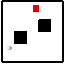

In [23]:
# Optionally, uncomment and run the code below if you have saved an animation (gui = True) that you want to visualize.

Image(filename='part_2_anim.png', width=200, height=200)

# Part III. Behavioral cloning with visual observations - multiple maps

This part is the same as  Part II except that it is trained and tested differently. **The training set involves expert demonstrations for the two new obstacle maps. And while testing, for each trial, a different obstacle map is randomly selected.** This means that your model has to learn how to reason about what an obstacle is, and how to go around it, based on nothing more than an image. The main objective of this part is to show that, when using a CNN, it is possible for a model to achieve this. The evaluation method for this part is the same as Part I and II.

In [24]:
# CNN Navigation Agent - Multi Map

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import random

class RGBBCRobot2(RobotPolicy):
    def __init__(self, seed_value=42):
        super().__init__()

        # Set seed for reproducibility
        self.set_seed(seed_value)

        # Initialize CNN architecture
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(32 * 16 * 16, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 4)
        )
        self.optimizer = optim.Adam(self.cnn.parameters(), lr=0.001)
        self.criterion = nn.CrossEntropyLoss()

    def set_seed(self, seed_value=42):
        random.seed(seed_value)         # Python random module
        np.random.seed(seed_value)      # Numpy module
        torch.manual_seed(seed_value)   # CPU operations

    def train(self, data):

        for key, val in data.items():
            print(key, val.shape)
        print("Using dummy solution for RGBBCRobot2")
        pass

        # Unpack the data and convert to tensors
        observations = torch.tensor(data['obs'], dtype=torch.float32).permute(0, 3, 1, 2)
        actions = torch.tensor(data['actions'], dtype=torch.long)

        dataset = TensorDataset(observations, actions)
        data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

        # Training loop
        self.cnn.train()
        for epoch in range(20):
            epoch_loss = 0.0
            for batch in data_loader:
                inputs, labels = batch
                self.optimizer.zero_grad()
                outputs = self.cnn(inputs)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            print(f'Epoch {epoch+1}, Average Loss: {epoch_loss / len(data_loader)}')

            # Check if the loss is low enough to stop training
            if epoch_loss / len(data_loader) < 0.14:
                print("Stopping training due to low loss.")
                break

    def get_action(self, obs):

        # Convert data to tensor
        obs_tensor = torch.tensor(obs, dtype=torch.float32).unsqueeze(0).permute(0, 3, 1, 2)

        self.cnn.eval()
        # Predict action
        with torch.no_grad():
            output = self.cnn(obs_tensor)
            predicted_action = torch.argmax(output, dim=1).item()

        return predicted_action

## Evaluation and Grading


In [25]:
# DO NOT CHANGE
# Getting the score and grade for Part 3

score3 = score_policy.score_rgb_bc2(policy=RGBBCRobot2(), gui=True, model=None)
grade3 = score3 / part3_bound * 6 if score3 < part3_bound else 6

print('\n---')
print(f'Part 3 Score: {score3}')
print(f'Part 3 Grade: {score3:.2f} / {part3_bound:.2f} * 6 = {grade3:.2f}')

actions (12000,)
obs (12000, 64, 64, 3)
Using dummy solution for RGBBCRobot2
Epoch 1, Average Loss: 1.085981623808543
Epoch 2, Average Loss: 0.48640774623552957
Epoch 3, Average Loss: 0.298859025200208
Epoch 4, Average Loss: 0.23681058982014655
Epoch 5, Average Loss: 0.20113636604944865
Epoch 6, Average Loss: 0.1670165067265431
Epoch 7, Average Loss: 0.14219164288043976
Epoch 8, Average Loss: 0.12294274331629276
Stopping training due to low loss.

---
Part 3 Score: 0.3108272385460017
Part 3 Grade: 0.31 / 0.95 * 6 = 1.96


In [26]:
# Optionally, uncomment and run the code below if you have saved an animation (gui = True) that you want to visualize.

Image(filename='part_3_anim.png', width=200, height=200)

FileNotFoundError: [Errno 2] No such file or directory: 'part_3_anim.png'

# Other Requirements and Hints

- **Training time**: To keep auto-grading feasible, your total training time must be strictly under 3 mins, 15mins, and 10 mins for parts 1, 2, and 3. These time budgets are more than enough to achieve full credits on this project. Note that longer training time does not necessarily mean higher performance because of overfitting. The faster your network trains the better!
- **Memory usage**: Make sure your code does not require too much memory. The required amount of RAM for this assignment should not be more than 8GB.
- **NO GPU**: No GPU is required or allowed for this assignment.
- **Reproducibility**: We have ensured that the randomness of the environment is deterministic. To get reproducible scores you must ensure your model training and prediction are also reproducible. The randomly initialized weights of the neural network should be made repeatable using seeding. You can add PyTorch seeding method below and see [PyTorch Reproducibility](https://pytorch.org/docs/stable/notes/randomness.html) to learn more.
  ```
  import torch
  torch.manual_seed(0)
  ```
- **Classifier**: In all the parts we are training a neural network to solve a classification problem and it is important to use a reasonable loss function. For example, the MSE (mean squared classification) error has drawbacks related to sensitivity. Cross entropy loss usually has good performance for classification tasks and you can find the documentation for it [here](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss) and is further explained below. However, note that you are free to use any loss function you like.
  - Cross entropy is a concept from information theory which is defined for two probability distributions. Cross entropy is minimum when the two distributions involved are the same and this is the property that makes it useful as a loss function in the context of machine learning. The idea is to minimize the cross entropy between the prediction distribution and the label distribution. For our case where we are training a neural network for classification, we can have the network output a score for each action. Cross entropy can be computed from these scores by converting to probability values (using softmax) and comparing it with the label distribution. The label distribution is obtained simply by assigning a probability of 1 to ground truth action and 0 to all other actions. Once trained, the best action can found by just choosing the action with the highest probability (i.e., the highest score) as predicted by the network.
- **Optimizer**: While it is possible to use a simple optimizer to achieve the desired accuracy, the training time can be quite high. There exist a number of optimizers implemented in PyTorch that have much faster convergence.
- **Parameter tuning**: Keep your architectures simple and slowly add complexity (more layers/kernels) to improve accuracy. Remember "To Err is Human" and the expert data (collected by a human) that you are training on is not perfect. Having a 100% training accuracy (very small training loss) might not be the best for achieving the highest score. So make sure your model does not overfit during training.
- **PyTorch input shape**: Notice that the expected input shape to CONV2D in PyTorch is (N, C, H, W), where N is the batch size, C is the number of channels, H is the image height and W is the image width. You will need to switch axes for the incoming images in order for them to be correctly passed to the first convolution layer.